<a href="https://colab.research.google.com/github/MaddalenaDona/Measles/blob/main/Figure6and7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from numpy.core.function_base import linspace
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.linalg import solve_triangular
from scipy import optimize


def matrix(n): #function that creates the matrix of the coefficients of the triangular system (Theorem 2.2 Andresson and Britton)
#note: if we fix n=2, for example, then we need to compute P_0,P_1,P_2 so the system has dimension n+1
  A=np.zeros((n+1,n+1))
  for l in range(n+1): #row
    for k in range(l+1): #column
      #p=p_L is the local infection probability
      A[l][k]=(math.comb(n-k,l-k))/((1-p)**((n-l)*(k+1))) #coefficient as in formula of Theorem 2.2 of Andresson & Britton, adapted to our case
  return(A)

def rhs(n): #function that creates a vector with the right hand side of the triangular system
  R=np.zeros(n+1) #the right hand side is a vector of dimension n+1
  for l in range(n+1):
    R[l]=math.comb(n,l)
  return(R)

p=0.5 #p_L probability of local infections
#p should NOT be treated as a parameter unless lambda_G is calculated as a function of it. Here p=0.5 and lambda_G is fixed=8.1
n=24 #maximum number of total unvax in the class-1 (one infected from outside, n susceptibles in the local epidemic)
#print(matrix(n))
#print(rhs(n))
def solve(n):
  P=solve_triangular(matrix(n), rhs(n), lower=True) #vector of probabilities
  return P

P=solve(n)
#P[i]= given that there is 1 initial infective in a class and n unvaccinated, P[i] indicates
#the probability that in the end i will be infected (with probability of contact given by p, closed and homogeneous population)
#print(P)
#print(np.sum(P)) #needs to be 1

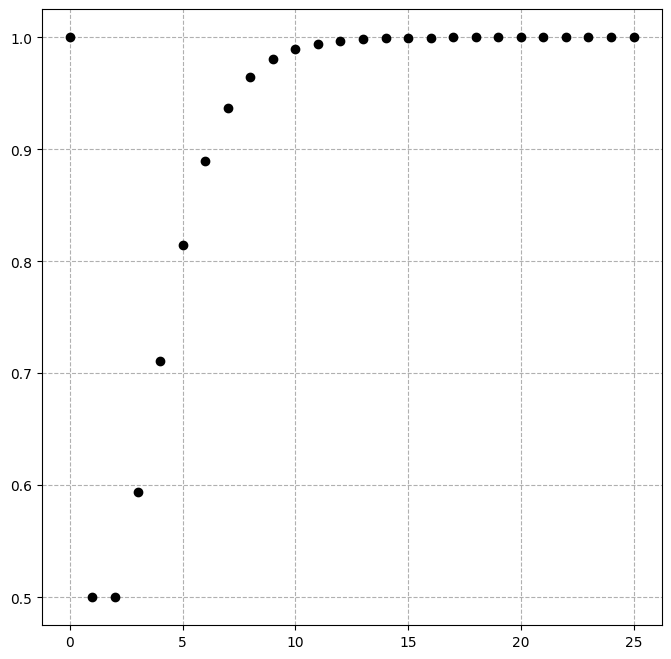

In [2]:
#Value of $P^n_n$ plotted as a function of $n$

K=[]
plt.figure(figsize=(8,8))
for k in range(26):
  K=solve(k)
  plt.plot(k,K[-1],'ok',)
plt.grid(ls='--')

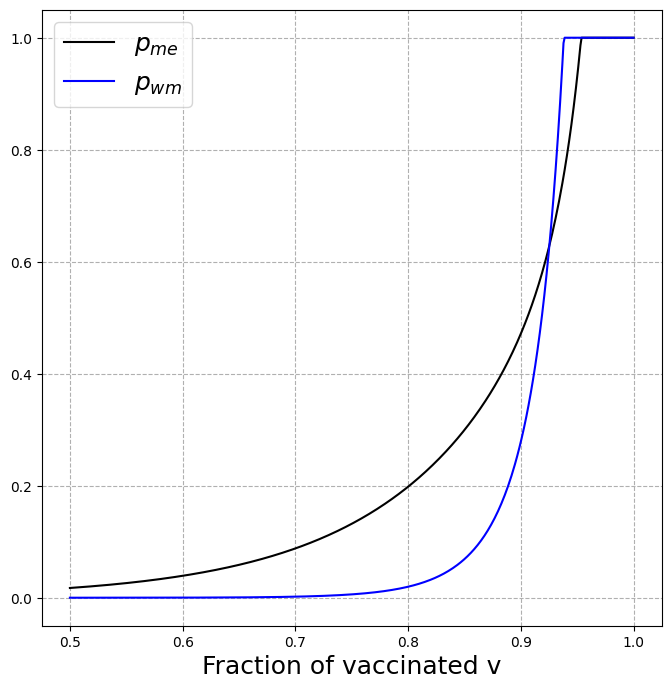

In [5]:
def g(z, v, pi): #finds Barq
  u=(1-v)/(1-pi)
  esp=np.exp(-8.1*(1-v)*(1-z))
  Q=[]
  T=0
  for l in range(n+1): #l=0,..,n
    sum=0
    Q.append(solve(l)) #Q[0]=[P^0_0]; Q[1]=[P^1_0, P^1_1], Q[2]=[P^2_0,P^2_1,P^2_2],..
    for j in range(l+1): #j=0,..,l
      #now we create the elements of the inner sum and add them up
      sum+=Q[l][j]*(esp**(j+1)) #Q[j] is a vector of probabilities of length j+1
    T+=math.comb(24,l)*(u**l)*((1-u)**(24-l))*sum
  z=T
  return z



#two cases (n=3 and n=4) written by hand separately to check:

def g3(z, v, pi): #special function for n=3
#works
  u=(1-v)/(1-pi)
  esp=np.exp(-8.1*(1-v)*(1-z))
  #A=solve(0) #(it is 1)
  B=solve(1)
  C=solve(2)
  D=solve(3)
  z=((1-u)**24)*esp + 24*u*((1-u)**23)*(B[0]*esp+B[1]*(esp**2)) + 12*23*(u**2)*((1-u)**22)*(C[0]*esp+C[1]*(esp**2)+C[2]*(esp**3)) + 4*23*22*(u**3)*((1-u)**21)*(D[0]*esp+D[1]*(esp**2)+D[2]*(esp**3)+D[3]*(esp**4))
  return z

def g4(z, v, pi): #special function for n=4
#works
  u=(1-v)/(1-pi)
  esp=np.exp(-8.1*(1-v)*(1-z))
  #A=solve(0) #(it is 1)
  B=solve(1)
  C=solve(2)
  D=solve(3)
  E=solve(4)
  z=((1-u)**24)*esp + 24*u*((1-u)**23)*(B[0]*esp+B[1]*(esp**2)) + 12*23*(u**2)*((1-u)**22)*(C[0]*esp+C[1]*(esp**2)+C[2]*(esp**3)) + 4*23*22*(u**3)*((1-u)**21)*(D[0]*esp+D[1]*(esp**2)+D[2]*(esp**3)+D[3]*(esp**4)) + 23*22*21*(u**4)*((1-u)**20)*(E[0]*esp+E[1]*(esp**2)+E[2]*(esp**3)+E[3]*(esp**4)+E[4]*(esp**5))
  return z

def f (z,v,pi):
  x=np.exp(-8.1*(1-v)*(1-z))
  return x

#v=0.9
v=np.linspace(0.5,1,500) #fraction of vaccinated
pi=0.5 #fraction of schools with a mandate
n=24 #the higher n, the closer this is to the plot where p_L=1
#n=24 means that we allow a class to have max 25 unvax, one of which is infected from outside
X=[]
Z=[]
X1=[]
for i in range(len(v)):
  Z.append(optimize.fixed_point(g, 0.2, args=(v[i],pi), xtol=1e-03, maxiter=5000)) #creating a list of values of the probability $p_{me}$.
  X.append(f(Z[i],v[i],pi))
  X1.append(optimize.fixed_point(g, 0.2, args=(v[i],0), xtol=1e-03, maxiter=1000)) # $p_{wm}$=\Bar{q} when pi=0


plt.figure(figsize=(8,8))
plt.plot(v,X,'k', label=r'$p_{me}$')
plt.plot(v,X1,'b', label=r'$p_{wm}$')
plt.grid(ls='--')
plt.xlabel('Fraction of vaccinated v', fontsize=18)
plt.legend(fontsize=18)


#Checking for crossing point:
#for i in range(len(v)-1):
 # if X[i]>X1[i] and X[i+1]<=X1[i+1]:
  #  print(v[i])


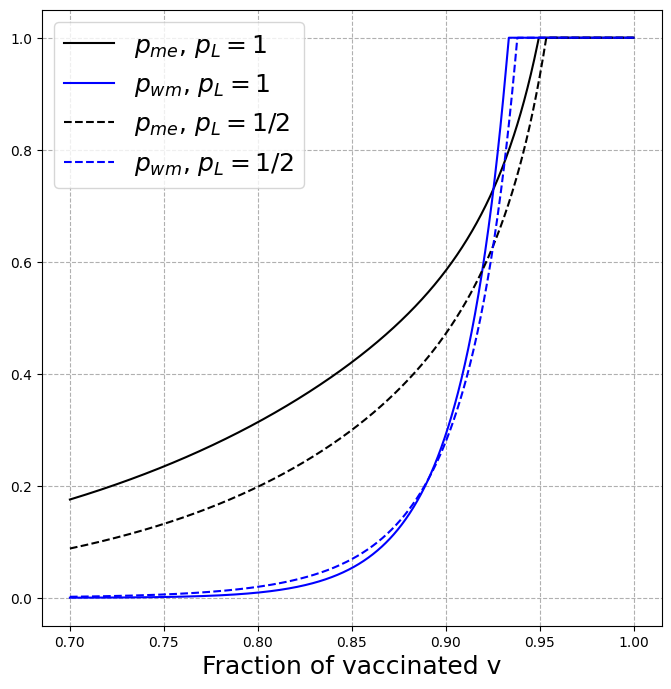

In [6]:
import numpy as np
from scipy import optimize
import math
import numpy as np
import matplotlib.pyplot as plt

#confronting the cases p_L=1 and p_L=1/2


def fun1(x, v, pi):
  u=(1-v)/(1-pi)
  z=x*(x*u+1-u)**(24)
  return np.exp(-5.8*(1-v)*(1-z))

def fun(x, v):
  y=x*(x*(1-v)+v)**(24)
  return y

#v=0.9
v=np.linspace(0.7,1,1000)
pi=0.5
X=[]
X1=[]
Y=[]
A=[]
B=[]
C=[]
for i in range(len(v)):
  X.append(optimize.fixed_point(fun1, 0.4, args=(v[i],pi)))
  X1.append(optimize.fixed_point(fun1, 0.4, args=(v[i],0)))
  Y.append(fun(X1[i],v[i]))
  A.append(optimize.fixed_point(g, 0.2, args=(v[i],pi), xtol=1e-03, maxiter=5000))
  B.append(f(A[i],v[i],pi))
  C.append(optimize.fixed_point(g, 0.2, args=(v[i],0), xtol=1e-03, maxiter=1000))



plt.figure(figsize=(8,8))
plt.plot(v,X,'k', label=r'$p_{me}$, $p_L=1$')
plt.plot(v,Y,'b', label=r'$p_{wm}$, $p_L=1$')
plt.plot(v,B,'--k', label=r'$p_{me}$, $p_L=1/2$')
plt.plot(v,C,'--b', label=r'$p_{wm}$, $p_L=1/2$')
plt.grid(ls='--')
plt.xlabel('Fraction of vaccinated v', fontsize=18)
plt.legend(fontsize=18)